In [174]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import re

class AI:
    def combination(img_dir1, img_dir2):
        image1 = Image.open(img_dir1)
        image2 = Image.open(img_dir2)
        w1, h1 = image1.size
        w2, h2 = image2.size
        if w1 > h1:
            deg_image1 = image1.transpose(Image.ROTATE_90)
        else:
            deg_image1 = image1

        if w2 > h2:
            deg_image2 = image2.transpose(Image.ROTATE_90)
        else:
            deg_image2 = image2


        image1_size = deg_image1.size
        image2_size = deg_image2.size
        new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
        new_image.paste(deg_image1,(0,0))
        new_image.paste(deg_image2,(image1_size[0],0))
        new_image.save("merged_image16.jpg","JPEG")
        #new_image.show()
        
    def test(img_dir):
        class_list2 = []
        data = pd.read_csv('./data.csv' , encoding='cp949')
        image_url = pd.DataFrame(data['품목명'])
        for i,row in image_url.iterrows():
            class_list2.append(row['품목명'])
        class_list= ['더블자임정','더블자임정2','더블자임정3','더블자임정4','러지피드정','러지피드정2','러지피드정3','러지피드정4'] + class_list2
        model = tf.keras.models.load_model('/home/ubuntu/ai_server/model/Pill_image_model_2_fix_5_4.h5')
        image = Image.open(img_dir)
        image = image.resize((224, 224))
        image = np.array(image)
        image = image/255.

        plt.imshow(image)
        plt.show()

        image = np.reshape(image, (1, 224, 224, 3))

        prediction = model.predict(image)
        #prediction.shape
        pred_class = np.argmax(prediction, axis=-1)%8
        new_str = class_list[int(pred_class)]
        if len(class_list[int(pred_class)]) == 6:
            if class_list[int(pred_class)][5].isdigit():
                new_str = re.sub(r"[0-9]", "", class_list[int(pred_class)])
        
        
        return new_str

In [110]:
AI.combination('/Users/ksjljk1030/sample/53.jpg','/Users/ksjljk1030/sample/54.jpg')

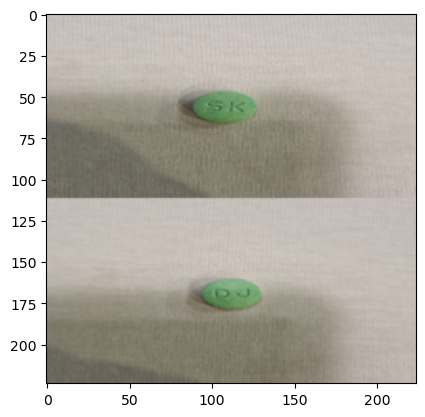

더블자임정


In [175]:
str=AI.test('/Users/ksjljk1030/sample/merged_image.jpg')
print(str)

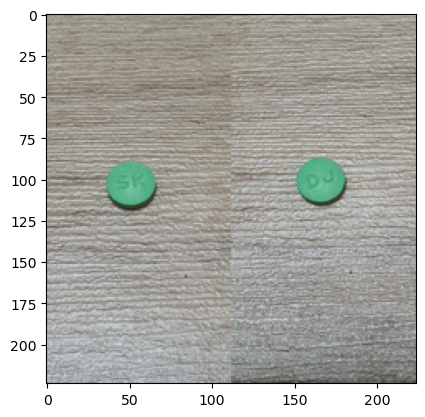

더블자임정


In [176]:
str=AI.test('/Users/ksjljk1030/sample/merged_image2.jpg')
print(str)

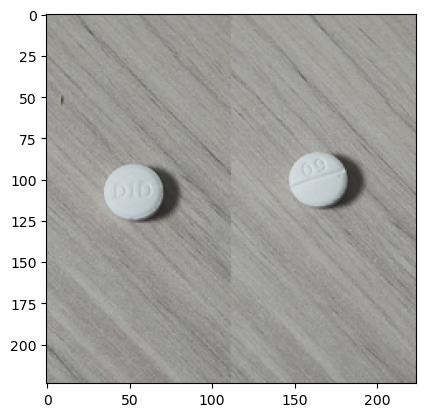

러지피드정


In [177]:
str=AI.test('/Users/ksjljk1030/sample/merged_image5.jpg')
print(str)

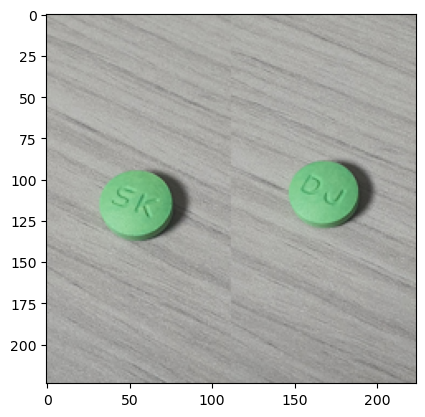

더블자임정


In [178]:
str=AI.test('/Users/ksjljk1030/sample/merged_image6.jpg')
print(str)

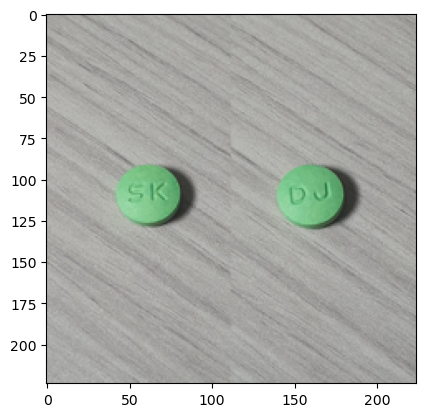

더블자임정


In [179]:
str=AI.test('/Users/ksjljk1030/sample/merged_image7.jpg')
print(str)

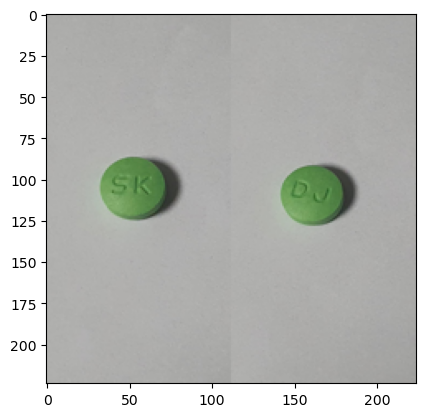

더블자임정


In [180]:
str=AI.test('/Users/ksjljk1030/sample/merged_image8.jpg')
print(str)

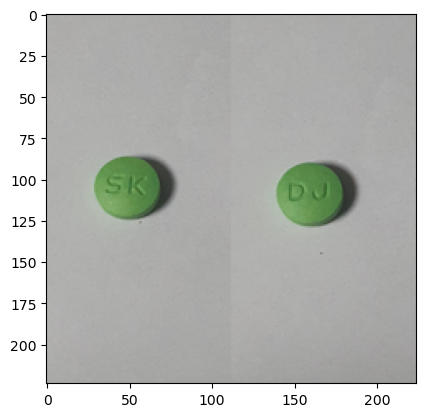

더블자임정


In [181]:
str=AI.test('/Users/ksjljk1030/sample/merged_image9.jpg')
print(str)

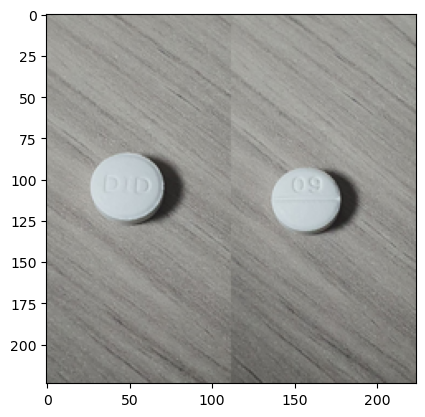

러지피드정


In [182]:
str=AI.test('/Users/ksjljk1030/sample/merged_image10.jpg')
print(str)

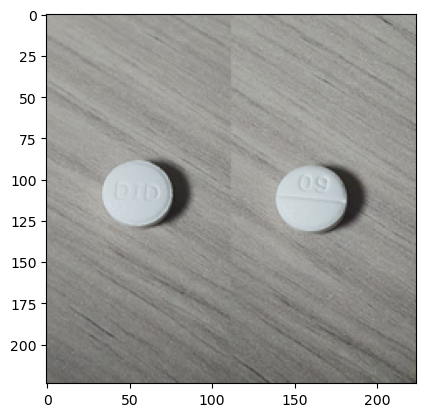

러지피드정


In [183]:
str=AI.test('/Users/ksjljk1030/sample/merged_image11.jpg')
print(str)

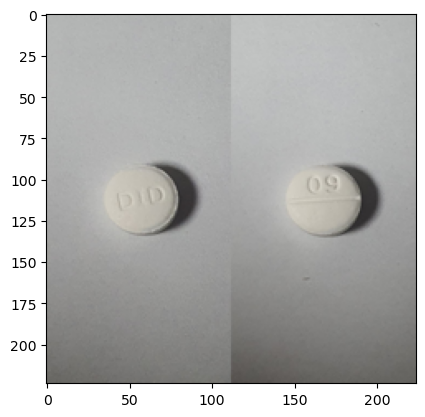

러지피드정


In [184]:
str=AI.test('/Users/ksjljk1030/sample/merged_image13.jpg')
print(str)

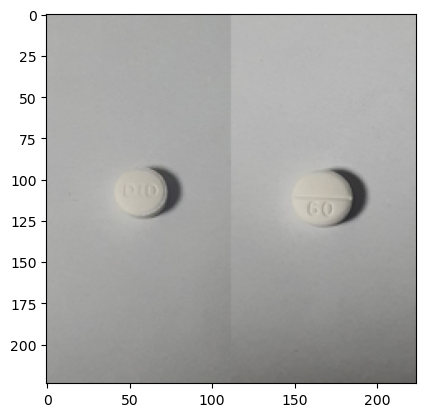

러지피드정


In [185]:
str=AI.test('/Users/ksjljk1030/sample/merged_image14.jpg')
print(str)

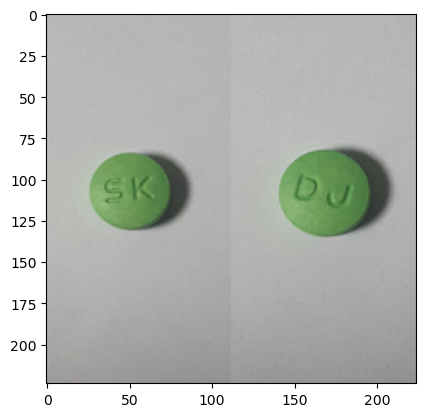

더블자임정


In [186]:
str=AI.test('/Users/ksjljk1030/sample/merged_image15.jpg')
print(str)

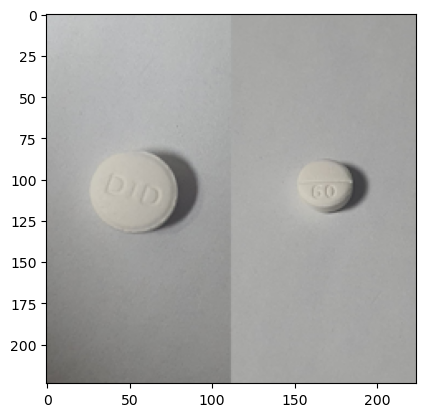

러지피드정


In [187]:
str=AI.test('/Users/ksjljk1030/sample/merged_image16.jpg')
print(str)